# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([-0.39740476, -0.11925339,  1.39557883,  1.15280428, -0.43485121,
        1.90875086,  0.66167593, -0.2698544 ,  0.17693255, -1.91836057,
        0.62626387,  1.29731786, -1.55211797, -0.87926051, -1.79221615,
       -2.33706418,  1.47057036, -0.33921522, -1.92108417, -0.05152681,
       -0.64104105,  1.21182403, -0.05061071, -0.65121765, -2.31325025,
        0.54101189,  0.92584093,  0.62470151, -0.6110237 , -1.01104475,
       -1.1834704 ,  1.13148288,  2.60266418,  1.41284477,  0.56772248,
       -0.351054  ,  0.42700838,  1.80866047,  0.3214227 ,  1.11267476,
        1.10030039, -1.13206346,  0.07490642,  0.82674415, -0.54462002,
        0.01705887, -1.5755698 , -0.5290158 ,  0.80453167,  0.41892079,
        1.79645907, -1.67541422,  0.59075788, -1.6266059 , -1.66870599,
        0.39714447,  0.3521188 ,  0.8501453 , -0.31279585, -0.51492958,
        1.90001491,  0.12883279, -0.35262815,  0.43932045, -1.10879399,
        0.06521514,  1.68765125, -0.00814161,  1.14186632,  0.63

In [7]:
sample.dtype

dtype('float64')

In [8]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины

In [9]:
real_mean

0.0

In [10]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины

In [11]:
real_var

1.2898681336964528

### Постройте гистограмму выборки и теоретическую плотность распределения

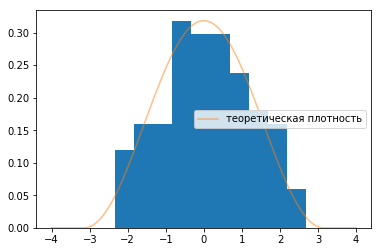

In [12]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [13]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.11978240438053696
1.4020657889831432


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [ ]:
# ваш код тут

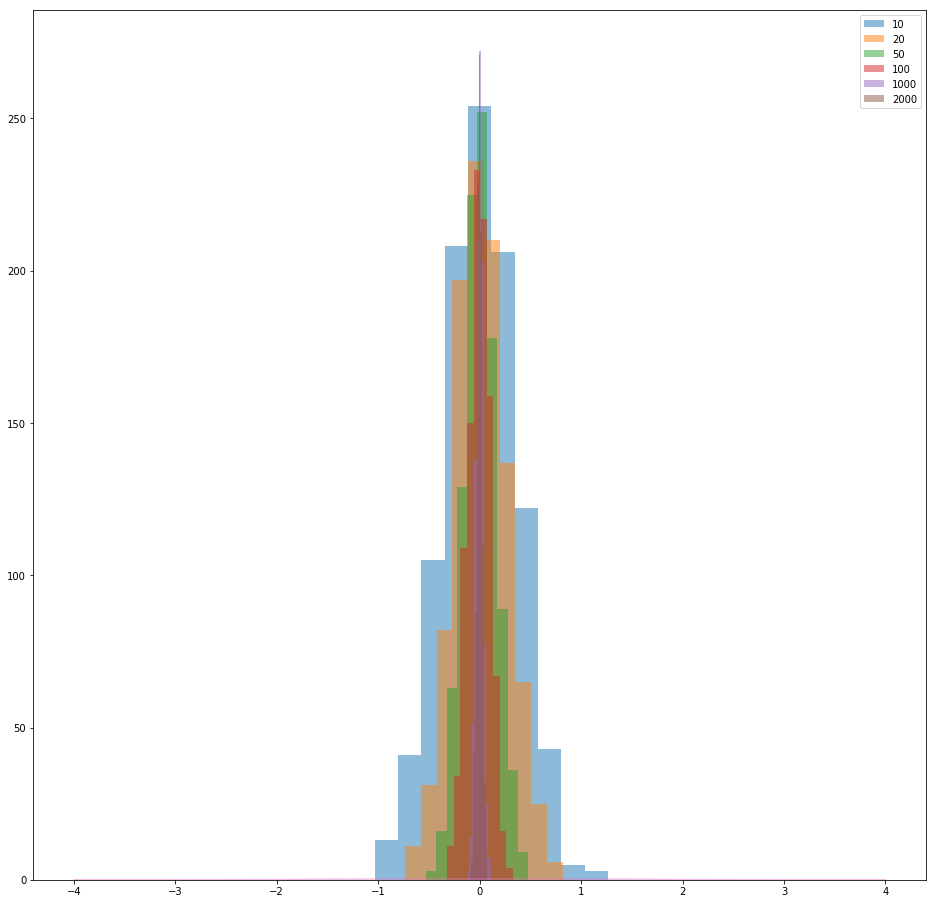

In [15]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100, 1000, 2000]:
    means = []
    for i in range(1000):
        means.append(np.mean(cosine_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '20', '50', '100', '1000','2000'])

pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
Судя по гистограмме, хорошо. Так как увеличение выборки уменьшает разброс.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing